Mean Absolute Error: 0.0000060347
Mean Squared Error: 0.0000000001


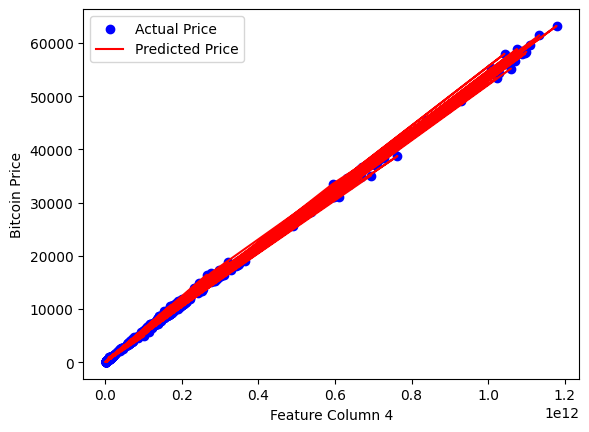

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''
Part 1: Preprocessing the data
'''

data = pd.read_excel("coin_Bitcoin.xlsx")

data['target'] = (data['Low'] + data['High']) / 2

data = data.drop(['Open', 'Close'], axis = 1)

features = data.drop(['target', 'Date'], axis = 1)
# features['Date'] = (features['Date'] - features['Date'].min()).dt.days
features = pd.get_dummies(features)

target = data['target']


'''
# Part 2: Splitting the data into training and testing sets (70 - 30)
'''

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

'''
# Part 3: Applyling Linear regression And calculating the absolute mean error and mean squared error
'''

model = LinearRegression()

model.fit(features_train, target_train)

target_prediction = model.predict(features_test)

print("Mean Absolute Error: {:.10f}".format(mean_absolute_error(target_test, target_prediction)))
print("Mean Squared Error: {:.10f}".format(mean_squared_error(target_test, target_prediction)))

'''
# Part 4: Plotting the data
'''

plt.scatter(features_test.iloc[:, 4], target_test, color='blue', label="Actual Price")
plt.plot(features_test.iloc[:, 4], target_prediction, color='red', label='Predicted Price')
plt.xlabel('Feature Column 4')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

'''
# Part 5 : Finding mean absoulte error and mean squared error from scratch
'''
features_train = features_train.apply(pd.to_numeric, errors='coerce')
def calculate_theta(X, y):
   X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

   theta = np.linalg.inv(X.T @ X) @ X.T @ y
   return theta


def predict(X, theta):
   X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
   return X @ theta

theta = calculate_theta(features_train, target_train)
target_predict_scratch = predict(features_test, theta)

# Calculating errors without using libraries
   
errors = target_test - target_predict_scratch
mean_absolute_error_scratch = np.mean(np.abs(errors))
mean_squared_error_scratch = np.mean(errors ** 2)

print("Mean Absolute Error: {:.10f}".format(mean_absolute_error_scratch))
print("Mean Squared Error: {:.10f}".format(mean_squared_error_scratch))
